In [1]:
from settings import *

random_rho0s: setting seed=42653


In [2]:
qubits = TriangularLayoutAB(m=m, cutoff=1, distance=0.9)
operations = [("rz", "AB"), ("rx", "AB"), ("rz", "AB"), ("ryd ent", "")]
circuit = unitary_circuit_fac(qubits, operations, repeats=1, depth=10)

<Axes: title={'center': 'Qubit layout'}>

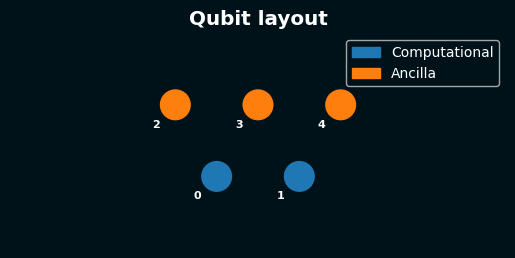

In [3]:
qubits.show_layout()

In [4]:
qubits.gate_connections

[GateConnection(id1=0, id2=1, d=0.9),
 GateConnection(id1=0, id2=2, d=0.9),
 GateConnection(id1=0, id2=3, d=0.9),
 GateConnection(id1=1, id2=3, d=0.9),
 GateConnection(id1=1, id2=4, d=0.9),
 GateConnection(id1=2, id2=3, d=0.9),
 GateConnection(id1=3, id2=4, d=0.9000000000000001)]

In [5]:
theta_init = np.load("both_theta_opt.npy")

In [6]:
theta_opt, errors, thetas = optimize(circuit, training_data, max_count=200, n_grad=10, theta_init=theta_init)

np.save("both_theta_opt", theta_opt)
np.save("both_thetas", thetas)
np.save("both_errors", errors)

optimizer (optimization indices): setting seed=27349


C:\Users\Admin\Desktop\BFP\quantum-channel-approximation\q_channel_approx\optimizer.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  errors[i] = error


-----
        Grad calculation time: 
        163.71306204795837 
        Armijo calculation time: 
        18.49041986465454 
        Total grad descend time: 
        3:2.20


In [7]:
theta_opt = np.load("both_theta_opt.npy")
thetas = np.load("both_thetas.npy")
errors = np.load("both_errors.npy")

In [8]:
theta_opt

array([0.98459463, 0.90314156, 1.        , 1.        , 1.        ,
       1.65639885, 1.6391694 , 0.84328112, 0.65613308, 0.87686846,
       0.93634488, 0.69584134, 1.43664875, 1.03941435, 1.55395798,
       1.16984232, 0.85829252, 0.99414253, 1.73787888, 1.02986812,
       1.64354151, 0.93218404, 0.77424407, 1.12261418, 0.89873786,
       1.01994981, 0.87590989, 1.21671348, 1.08487763, 1.03712841,
       0.81030518, 0.60615947, 1.06513409, 0.73986006, 1.07506825,
       1.08714593, 1.21297977, 0.9386442 , 1.03557593, 0.97099437,
       1.24934517, 0.90650181, 0.89907889, 0.88869896, 1.18401146,
       1.40786794, 1.26912247, 1.14751677, 0.73780367, 0.70687866,
       1.17988887, 1.21338152, 1.26374804, 1.07132486, 1.09877662,
       0.97458191, 1.02266377, 1.00419226, 0.9505733 , 1.18221275,
       1.12437774, 0.88576892, 1.2672619 , 0.95454528, 1.11024929,
       1.02488354, 1.17938081, 0.97237107, 0.95497257, 1.31843241,
       1.36110061, 0.66908253, 1.1149705 , 0.6688713 , 1.11656

rho_rand_haar: seed=55672


c:\Users\Admin\Desktop\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Admin\Desktop\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Axes: title={'center': 'ref: dashed line, approx: solid line'}, xlabel='time', ylabel='population'>

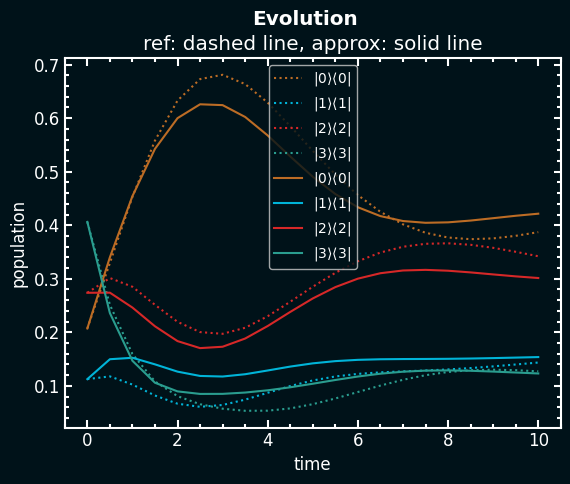

In [9]:
rho0 = rho_rand_haar(m)
evolver = evolver_fac(circuit, theta_opt)
rhos = evolver(20, rho0.full())

Os = [O.full() for O in create_observables_comp_basis(m)]

ess = measure_rhos(rhos, Os)
rho_ref_s, ts = solve_lindblad_rho0(rho0, delta_t=0.5, N=20, s=system, jump_opers=jump_oper)
e_ref_ss = measure_rhos([r.full() for r in rho_ref_s], Os)
compare_ess((ts, ess, "approx"), (ts, e_ref_ss, "ref"), labels=comp_basis_labels(m))

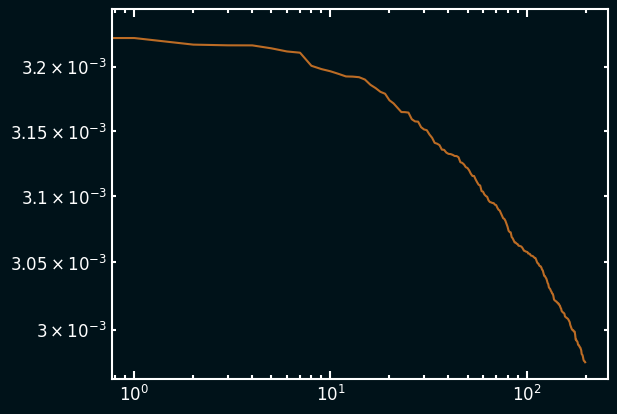

In [10]:
plt.loglog(errors)